In [4]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans

data = pd.read_csv('dataset/housing (2).csv', usecols=['longitude', 'latitude', 'median_house_value'])
data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


In [21]:
print(data.isna().sum(),end='\n\n', flush=True)
print(data[['longitude','latitude','median_house_value']].describe())



longitude             0
latitude              0
median_house_value    0
dtype: int64

          longitude      latitude  median_house_value
count  20640.000000  20640.000000        20640.000000
mean    -119.569704     35.631861       206855.816909
std        2.003532      2.135952       115395.615874
min     -124.350000     32.540000        14999.000000
25%     -121.800000     33.930000       119600.000000
50%     -118.490000     34.260000       179700.000000
75%     -118.010000     37.710000       264725.000000
max     -114.310000     41.950000       500001.000000


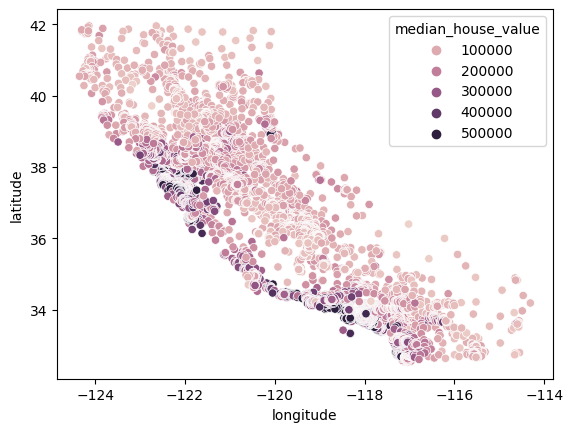

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = data, x = 'longitude', y = 'latitude', hue = 'median_house_value')
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


X_train, X_test, y_train, y_test = train_test_split(data[['latitude', 'longitude']], data[['median_house_value']], train_size=0.75, random_state=40)
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [48]:
X_train_norm = np.array(X_train_norm)
X_test_norm = np.array(X_test_norm)


kmeans = KMeans(n_clusters = 3, random_state = 40, n_init='auto')
kmeans.fit(X_train_norm)


KMeans(n_clusters=3, n_init='auto', random_state=40)

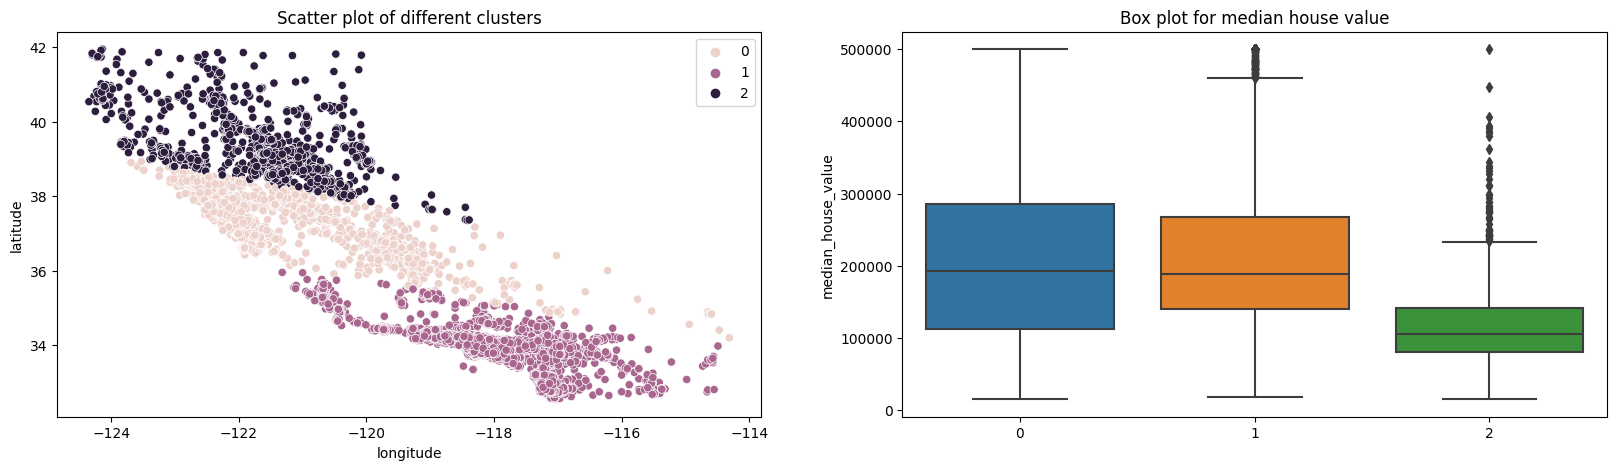

In [49]:
#plotting the clusters

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Scatter plot of different clusters")
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)
plt.subplot(1,2,2)
plt.title("Box plot for median house value")
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])
plt.show()

In [45]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7494947497492455

*~Finding the best value of K~*

In [51]:
k = range(2, 8)
fits = []
score = []

for i in k:
    kmeans = KMeans(n_clusters = i, random_state = 40, n_init='auto')
    kmeans.fit(X_train_norm)
    fits.append(kmeans)
    score.append(silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean'))

For k =  2 , silhouette score =  0.7759706486343533
For k =  3 , silhouette score =  0.7494947497492455
For k =  4 , silhouette score =  0.6995570338937581
For k =  5 , silhouette score =  0.6365056356671042
For k =  6 , silhouette score =  0.6293602738886189
For k =  7 , silhouette score =  0.6430453513647314


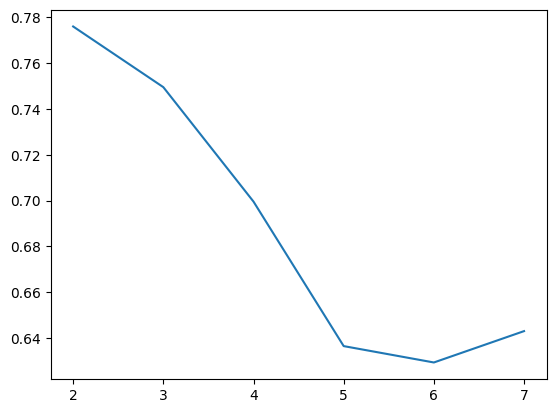

In [53]:
for i in range(len(k)):
    print("For k = ", k[i], ", silhouette score = ", score[i])

plt.plot(k, score)

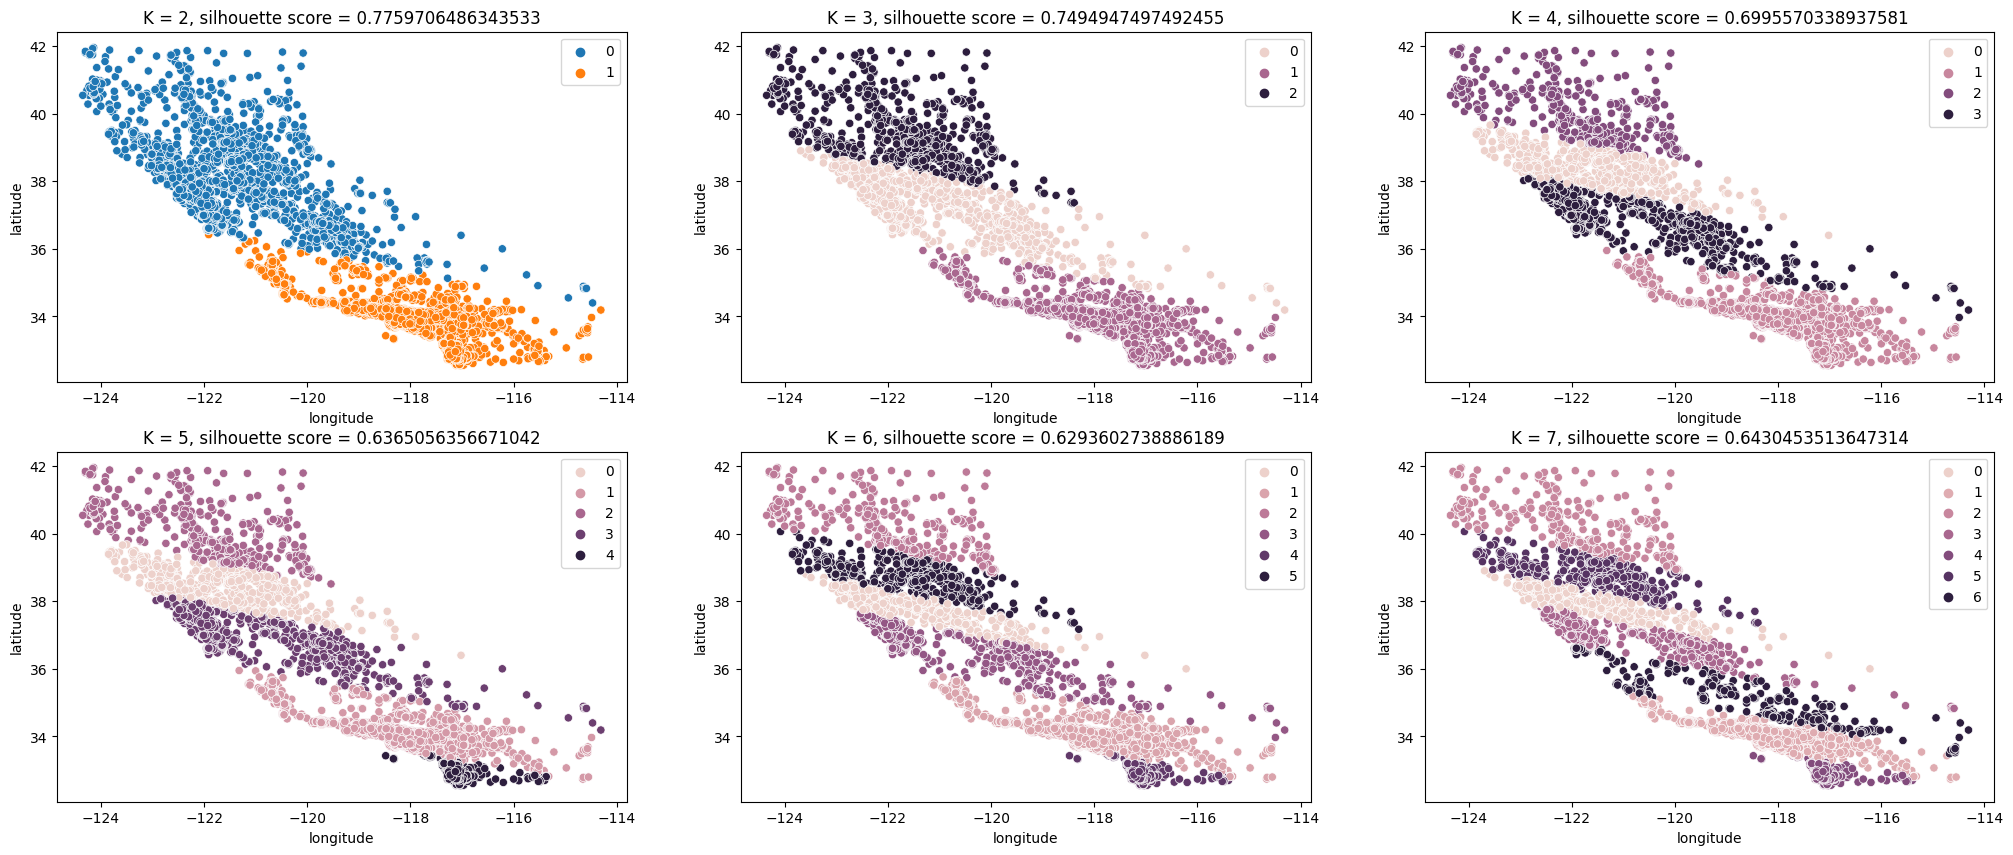

In [82]:
# print(len(k))

plt.figure(figsize=(25,10))
for i in range(len(k)):
    plt.subplot(2,3,i+1)
    plt.title("K = " + str(k[i])+ ", silhouette score = " + str(score[i]))
    sns.scatterplot(data=X_train, x='longitude', y='latitude', hue=fits[i].labels_)

plt.show()

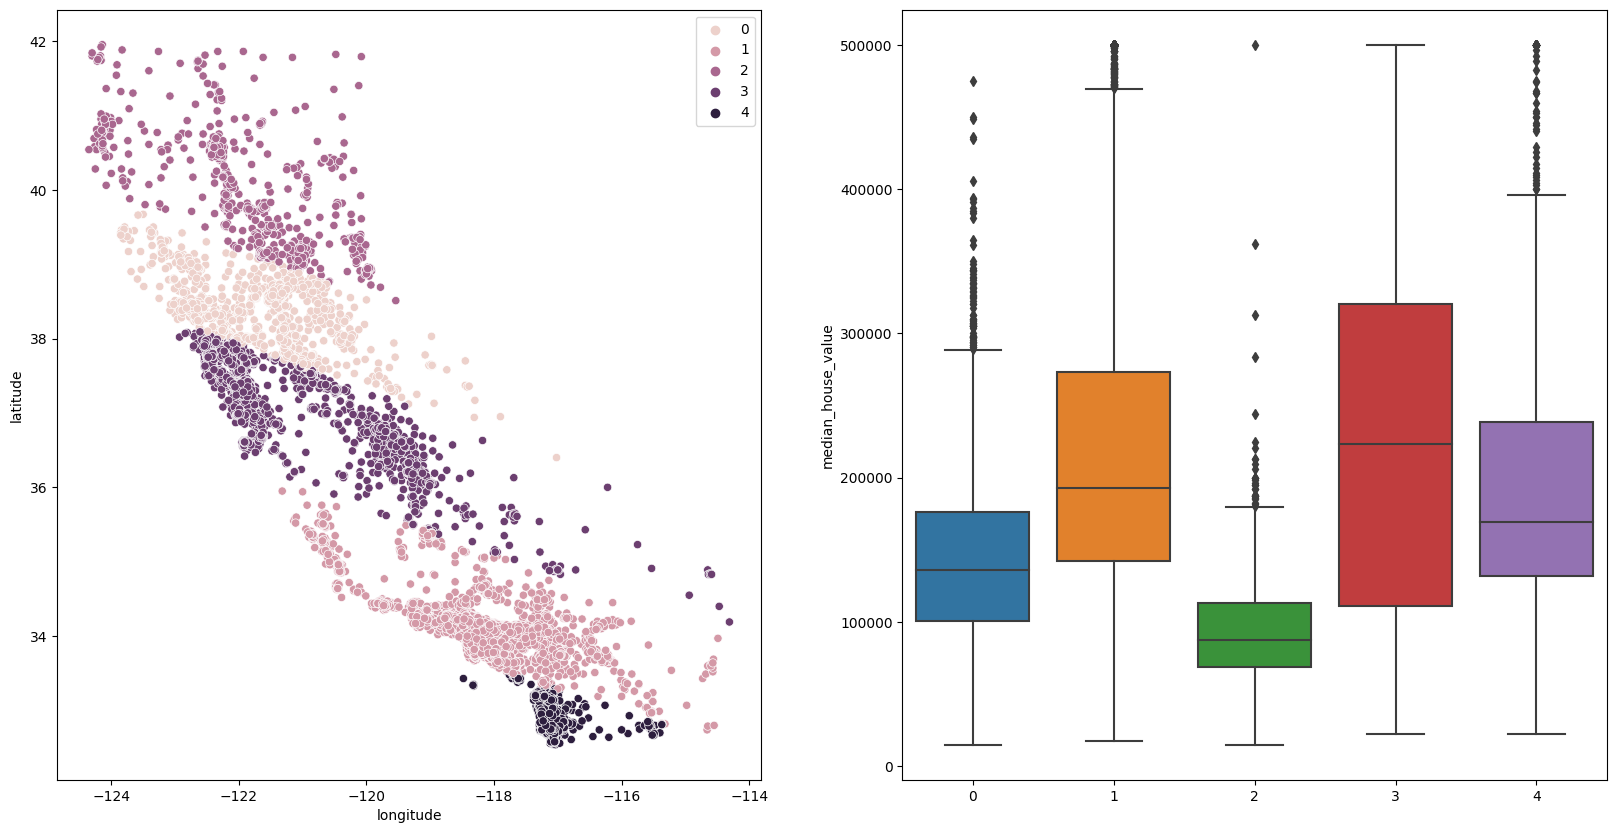

In [84]:
#plotting the clusters

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
# plt.title("Scatter plot of different clusters")
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue =fits[3].labels_)
plt.subplot(1,2,2)
# plt.title("Box plot for median house value")
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])
plt.show()

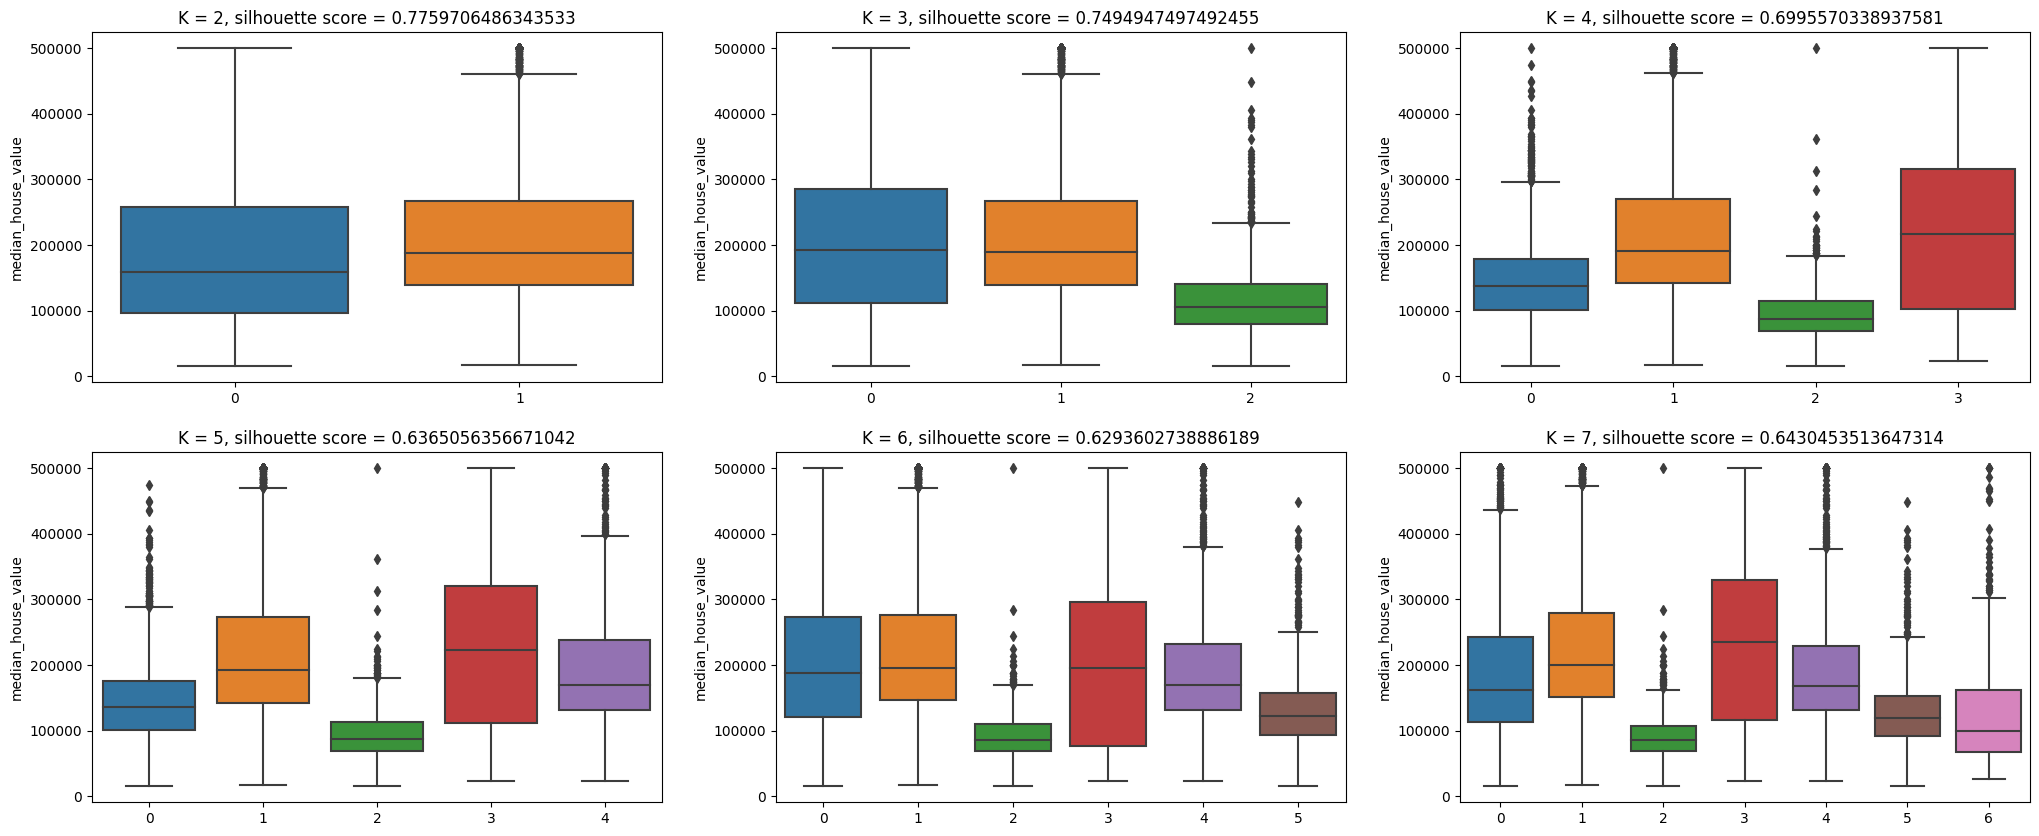

In [93]:
# print(len(k))

plt.figure(figsize=(25,10))
for i in range(len(k)):
    plt.subplot(2,3,i+1)
    plt.title("K = " + str(k[i])+ ", silhouette score = " + str(score[i]))
    sns.boxplot(x = fits[i].labels_, y = y_train['median_house_value'])


plt.show()